In [1]:
import cobra
import os
import glob
import pandas as pd

# Matplotlib defaults
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as mticker
matplotlib.rcParams["savefig.dpi"] = 300
matplotlib.rcParams['figure.dpi'] = 300
#Rivanna fonts should include sans-serif now, but this could still raise an error
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

SMALLER_SIZE = 8
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

matplotlib.rc('font', size=SMALL_SIZE)          # controls default text sizes
matplotlib.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=SMALLER_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
model_dict_gf = dict()
path = "/home/mac9jc/paradigm/models/"
os.chdir(path)

for filename in glob.glob(os.path.join(path, 'gf_*.xml')):
    key = filename.split('/')[len(filename.split('/'))-1]
    key = key[:-4]
    key = key[3:]
    if key.startswith('P'):
        key = key #GOOD
    else:
        key = key[9:]
        if key.startswith('P'):
            if key.startswith('Pneu') or key.startswith('Pconfu'):
                key = key
            else: key = 'NA'
        else: key = key
    if key != 'NA':
        model_dict_gf[key] = cobra.io.read_sbml_model(filename)
        

In [3]:
toxo_model = dict()
plasmo_model = dict()
crypto_model = dict()
cryptodb = ["Candersoni30847","Chominis30976","ChominisTU502","ChominisTU502_2012","ChominisUdeA01","CmeleagridisUKMEL1","CmurisRN66","CparvumIowaII","CtyzzeriUGA55", "Cubiquitum39726","CveliaCCMP2878", "GniphandrodesUnknown", "VbrassicaformisCCMP3155"]

for species, model in model_dict_gf.items():
    if species.startswith('Tgondi'):
        toxo_model[species] = model
    elif species.startswith('P'):
        if ~species.startswith('Pneu') and ~species.startswith('Pconfu'):
            plasmo_model[species] = model
    elif species in cryptodb and species.startswith('C'):
        crypto_model[species] = model
del crypto_model['CveliaCCMP2878']
    

In [4]:
toxo_rxns = list()
for model in toxo_model.values():
    toxo_rxns.extend([r.id for r in model.reactions ])
toxo_rxns = set(toxo_rxns)

plasmo_rxns = list()
for model in plasmo_model.values():
    plasmo_rxns.extend([r.id for r in model.reactions ])
plasmo_rxns = set(plasmo_rxns)

crypto_rxns = list()
for model in crypto_model.values():
    crypto_rxns.extend([r.id for r in model.reactions ])
crypto_rxns = set(crypto_rxns)


In [5]:
toxo_scores = dict()
plasmo_scores = dict()
crypto_scores = dict()
for species, model in toxo_model.items():
    toxo_scores[species] = len(model.reactions)/len(toxo_rxns)
for species, model in plasmo_model.items():
    plasmo_scores[species] = len(model.reactions)/len(plasmo_rxns)
for species, model in crypto_model.items():
    crypto_scores[species] = len(model.reactions)/len(crypto_rxns)
toxo_df = pd.DataFrame.from_dict(toxo_scores, orient='index')
plasmo_df = pd.DataFrame.from_dict(plasmo_scores, orient='index')
crypto_df = pd.DataFrame.from_dict(crypto_scores, orient='index')  

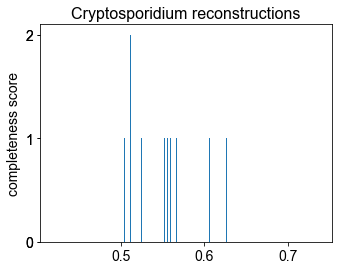

In [6]:
crypto_df.rename(columns = {0:'score'}, inplace = True)
maxval = 1.2*crypto_df['score'].max()
minval = 0.8*crypto_df['score'].min()

fig,ax = plt.subplots()
plt.hist(crypto_df['score'], bins = 100)
plt.xlim(minval, maxval) 
yint = []
locs, labels = plt.yticks()
for each in locs:
    yint.append(int(each))
plt.yticks(yint)
plt.title('Cryptosporidium reconstructions')
plt.ylabel('completeness score')
plt.subplots_adjust(right = 0.8)
plt.show() 

fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/crypto_completeness.svg")
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/crypto_completeness.png")

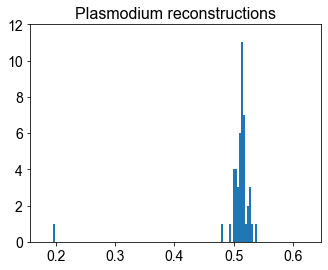

In [7]:
plasmo_df.rename(columns = {0:'score'}, inplace = True)
maxval = 1.2*plasmo_df['score'].max()
minval = 0.8*plasmo_df['score'].min()

fig,ax = plt.subplots()
plt.hist(plasmo_df['score'], bins = 100)
plt.xlim(minval, maxval) 
yint = []
locs, labels = plt.yticks()
for each in locs:
    yint.append(int(each))
plt.yticks(yint)
plt.title('Plasmodium reconstructions')
plt.subplots_adjust(right = 0.8)
plt.show() 


fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/plasmo_completeness.svg")
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/plasmo_completeness.png")

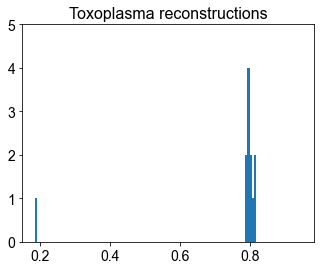

In [8]:
toxo_df.rename(columns = {0:'score'}, inplace = True)
maxval = 1.2*toxo_df['score'].max()
minval = 0.8*toxo_df['score'].min()

fig,ax = plt.subplots()
plt.hist(toxo_df['score'], bins = 100)
plt.xlim(minval, maxval) 
yint = []
locs, labels = plt.yticks()
for each in locs:
    yint.append(int(each))
plt.yticks(yint)
plt.title('Toxoplasma reconstructions')
plt.subplots_adjust(right = 0.8)
plt.show() 

fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/toxo_completeness.svg")
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/toxo_completeness.png")

In [9]:
toxo_df.append(plasmo_df).append(crypto_df).to_csv("/home/mac9jc/paradigm/data/results/completeness_scores.csv")